# Obesity, Nutrition & Physical Activity - Data Analysis
### Dataset Source: Behavioral Risk Factor Surveillance System
**Objectives:** Data Cleaning, EDA, Visualization, Statistical Analysis, and Summary Statistics.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [8]:
# Load the dataset
file_path = r"Nutrition__Physical_Activity.xlsx"
df = pd.read_excel(file_path, sheet_name='Nutrition__Physical_Activity__a')
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Sex,Female,SEX,FEMALE
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525


## 1. Data Cleaning and Preprocessing

In [9]:
# Drop columns with too many missing values
df_cleaned = df.drop(columns=['Total', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote'])

# Drop rows where Data_Value is missing
df_cleaned = df_cleaned.dropna(subset=['Data_Value'])

# Rename columns for convenience
df_cleaned = df_cleaned.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Value'})
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93505 entries, 0 to 104271
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  93505 non-null  int64  
 1   YearEnd                    93505 non-null  int64  
 2   LocationAbbr               93505 non-null  object 
 3   State                      93505 non-null  object 
 4   Datasource                 93505 non-null  object 
 5   Class                      93505 non-null  object 
 6   Topic                      93505 non-null  object 
 7   Question                   93505 non-null  object 
 8   Data_Value_Unit            79851 non-null  float64
 9   Data_Value_Type            93505 non-null  object 
 10  Value                      93505 non-null  float64
 11  Data_Value_Alt             93505 non-null  float64
 12  Low_Confidence_Limit       93505 non-null  float64
 13  High_Confidence_Limit      93505 non-null  float64

## 2. Visualizations using Matplotlib and Seaborn

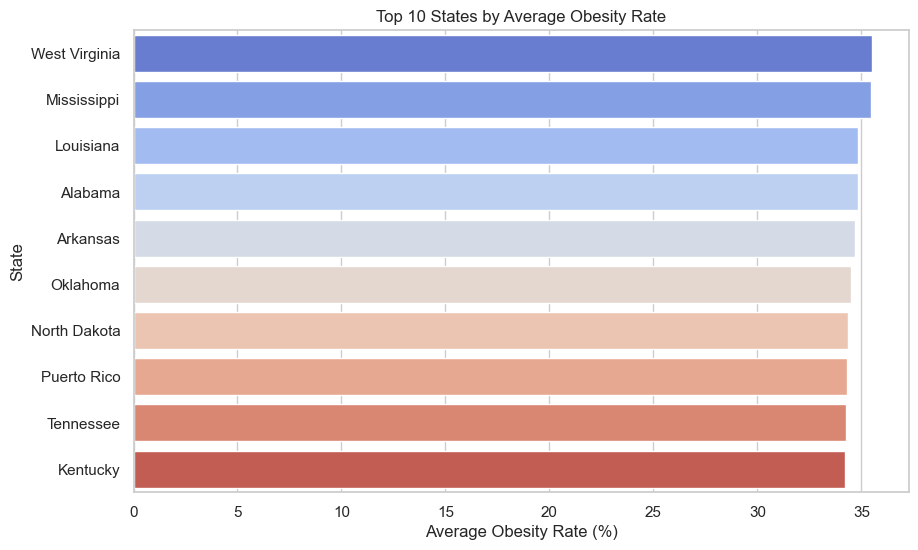

In [10]:
# Bar plot: Average Obesity Rate by State (Top 10)
top_states = df_cleaned[df_cleaned['Class'] == 'Obesity / Weight Status']
avg_obesity = top_states.groupby('State')['Value'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_obesity.values, y=avg_obesity.index, palette='coolwarm')
plt.title('Top 10 States by Average Obesity Rate')
plt.xlabel('Average Obesity Rate (%)')
plt.ylabel('State')
plt.show()

<Axes: title={'center': 'Top Topics in Dataset'}, ylabel='Topic'>

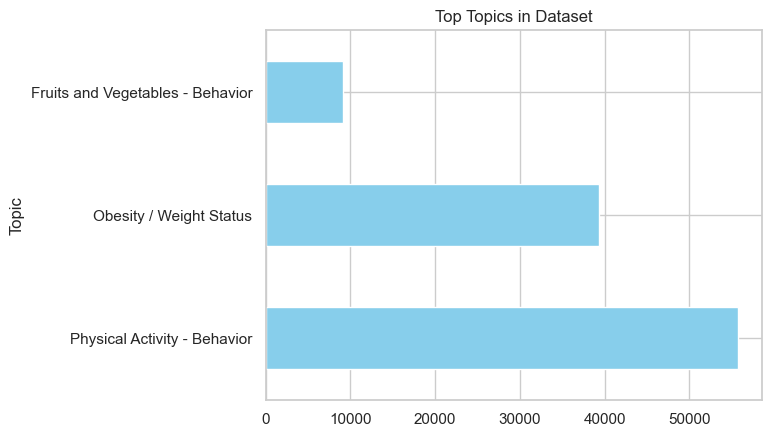

In [15]:
df['Topic'].value_counts().head(10).plot(kind='barh', title='Top Topics in Dataset', color='skyblue')

In [21]:
obesity_df = df[df['Question'].str.contains('with obesity', case=False, na=False)]
print(obesity_df.shape)


(0, 33)


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='muted')


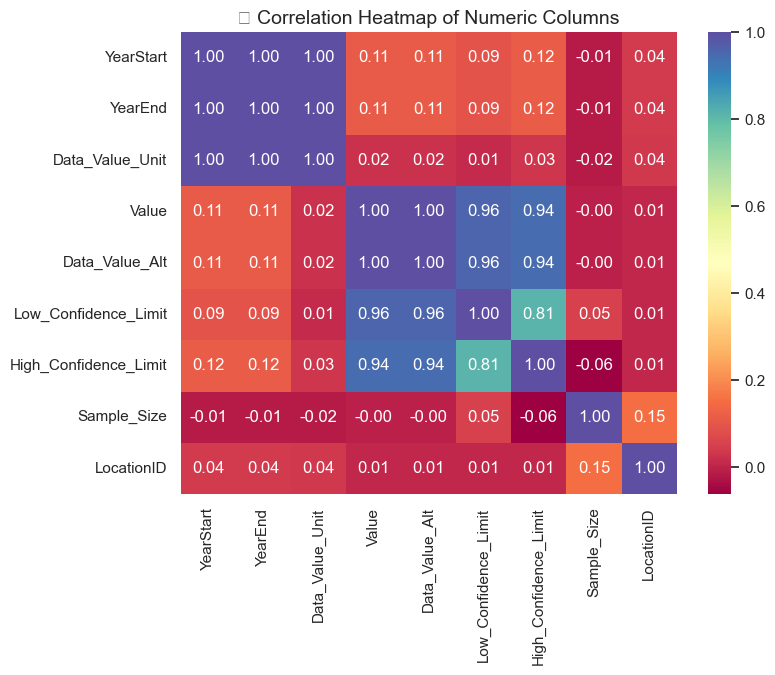

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(df_cleaned.select_dtypes(include='number').corr(), annot=True, cmap='Spectral', fmt='.2f')
plt.title("🔍 Correlation Heatmap of Numeric Columns", fontsize=14)
plt.show()


## 3. Exploratory Data Analysis (EDA)

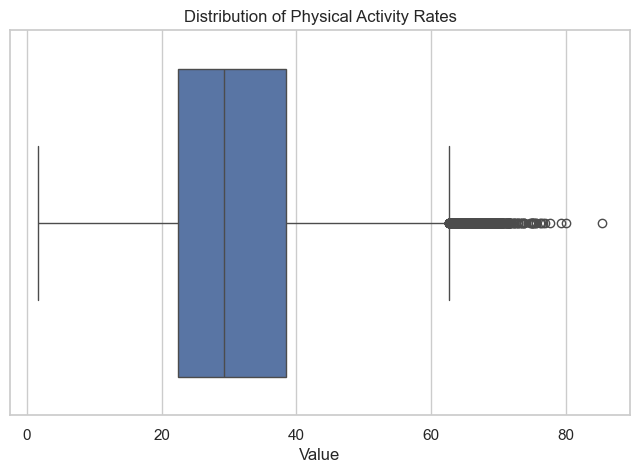

In [12]:
# Boxplot of physical activity values
plt.figure(figsize=(8,5))
sns.boxplot(data=df_cleaned[df_cleaned['Class'] == 'Physical Activity'], x='Value')
plt.title('Distribution of Physical Activity Rates')
plt.show()

## 4. Hypothesis Testing

In [13]:
# t-test: Compare male vs female obesity rates
male = df_cleaned[(df_cleaned['Class'] == 'Obesity / Weight Status') & (df_cleaned['Stratification1'] == 'Male')]['Value']
female = df_cleaned[(df_cleaned['Class'] == 'Obesity / Weight Status') & (df_cleaned['Stratification1'] == 'Female')]['Value']
t_stat, p_val = stats.ttest_ind(male, female, nan_policy='omit')
print(f'T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}')
if p_val < 0.05:
    print('Result: Statistically significant difference in obesity rates between males and females.')
else:
    print('Result: No statistically significant difference.')

T-statistic: 28.8080, P-value: 0.0000
Result: Statistically significant difference in obesity rates between males and females.


## 5. Basic Summary Statistics

In [14]:
# Descriptive statistics for obesity data
obesity_data = df_cleaned[df_cleaned['Class'] == 'Obesity / Weight Status']
obesity_data['Value'].describe()

count    35388.000000
mean        32.713482
std          6.398745
min          0.900000
25%         29.300000
50%         33.600000
75%         36.800000
max         71.100000
Name: Value, dtype: float64

6. VISUALIZTION USING EDA

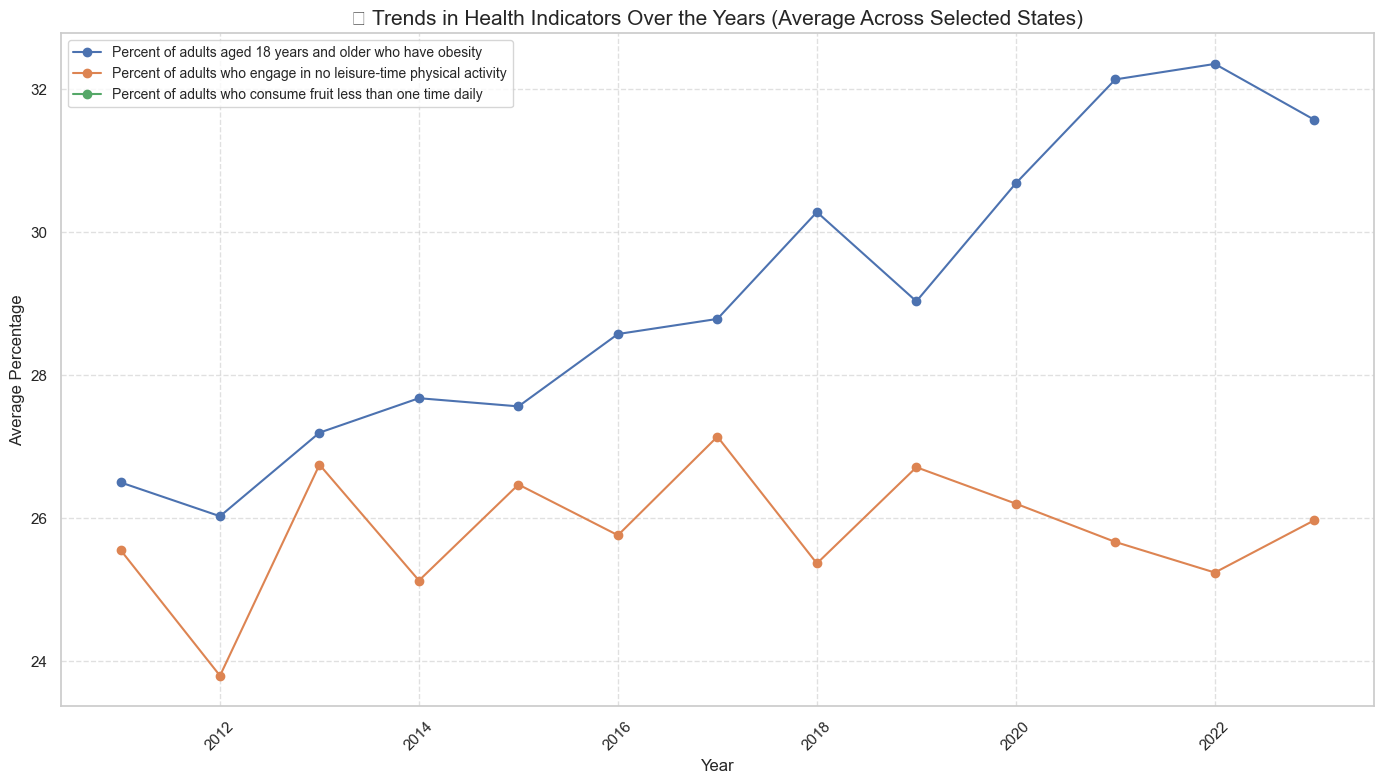

In [35]:
# Strip whitespace from column names to avoid KeyErrors
df.columns = df.columns.str.strip()

# Filter the dataset for a few relevant physical activity or obesity questions across a few states
selected_questions = [
    'Percent of adults aged 18 years and older who have obesity',
    'Percent of adults who engage in no leisure-time physical activity',
    'Percent of adults who consume fruit less than one time daily'
]

selected_states = ['California', 'Texas', 'New York', 'Florida', 'Illinois']

# Create line plots for each selected question
plt.figure(figsize=(14, 8))

for question in selected_questions:
    subset = df[
        (df['Question'] == question) &
        (df['LocationDesc'].isin(selected_states))
    ]

    # Group by year and take the average
    grouped = subset.groupby('YearStart')['Data_Value'].mean().sort_index()
    plt.plot(grouped.index, grouped.values, marker='o', label=question)

# Customizing the plot
plt.title('📈 Trends in Health Indicators Over the Years (Average Across Selected States)', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Percentage', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='best', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


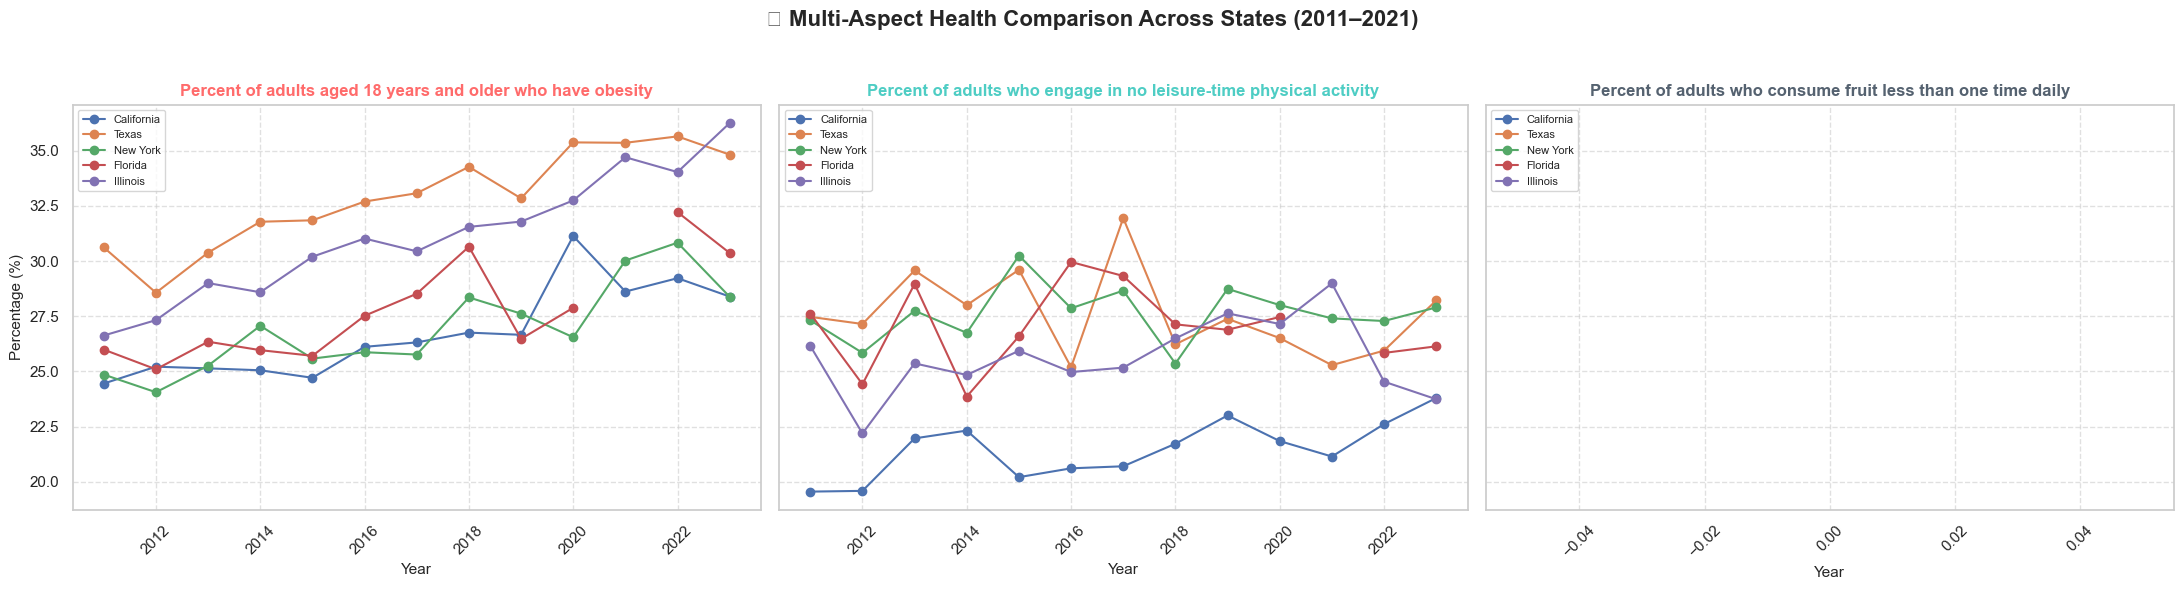

In [34]:
# Clean column names
df.columns = df.columns.str.strip()

# Define target questions and states
questions = [
    'Percent of adults aged 18 years and older who have obesity',
    'Percent of adults who engage in no leisure-time physical activity',
    'Percent of adults who consume fruit less than one time daily'
]
states = ['California', 'Texas', 'New York', 'Florida', 'Illinois']

# Set up the plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 6), sharey=True)
colors = ['#FF6B6B', '#4ECDC4', '#556270']  # Color palette

# Loop through each question to plot
for i, question in enumerate(questions):
    ax = axes[i]
    for state in states:
        subset = df[(df['Question'] == question) & (df['LocationDesc'] == state)]
        subset = subset.groupby('YearStart')['Data_Value'].mean().sort_index()
        ax.plot(subset.index, subset.values, marker='o', label=state)

    ax.set_title(question, fontsize=12, fontweight='bold', color=colors[i])
    ax.set_xlabel('Year', fontsize=11)
    if i == 0:
        ax.set_ylabel('Percentage (%)', fontsize=11)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(loc='upper left', fontsize=8)
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('📊 Multi-Aspect Health Comparison Across States (2011–2021)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
